# WeatherPy

In [230]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

In [231]:
from api_keys import api_key
from citipy import citipy

# Generating Cities List

In [233]:
#Generate list of cities
coordinates = []
cities = []
lats = np.random.uniform(low=-90,high=90,size=1500)
lngs = np.random.uniform(low=-180,high=180,size=1500)
lat_lng = zip(lats,lngs)

In [234]:
#nearest cities 
for coord in lat_lng:
    city = citipy.nearest_city(coord[0],coord[1]).city_name
    if city not in cities:
        cities.append(city)
len(cities)

640

Performing API Calls

In [262]:
base_url = 'http://api.openweathermap.org/data/2.5/weather?'

responses = []
lats = []
lngs = []
cloudiness = []
countries = []
dates = []
humids = []
maxtemps = []
winds = []

In [236]:
print('Beginning Data Retrieval')
print('-----------------------------')

for city in cities:

    try:
        url = base_url+"appid="+api_key+"&q="+city
        response = requests.get(url).json()
        responses.append(response)
        lat = response['coord']['lat']
        lats.append(lat)
        lng = response['coord']['lon']
        lngs.append(lng)
        cloud = response['clouds']['all']
        cloudiness.append(cloud)
        country = response['sys']['country']
        countries.append(country)
        date = response['dt']
        dates.append(date)
        humid = response['main']['humidity']
        humids.append(humid)
        maxtemp=response['main']['temp_max']
        maxtemps.append(maxtemp)
        wind = response['wind']['speed']
        winds.append(wind)

        print(f'Processing Record | {city}')

    except:
        print("City not found. Skipping ...")

Processing Record | lysva
Processing Record | aykhal
Processing Record | airai
Processing Record | ostersund
City not found. Skipping ...
Processing Record | albany
Processing Record | rikitea
Processing Record | butaritari
Processing Record | ushuaia
Processing Record | kodiak
Processing Record | talnakh
Processing Record | arraial do cabo
Processing Record | lodja
Processing Record | beringovskiy
Processing Record | cajibio
Processing Record | katsuura
Processing Record | mataura
Processing Record | bethel
Processing Record | bluff
City not found. Skipping ...
Processing Record | hermanus
Processing Record | klaksvik
City not found. Skipping ...
Processing Record | constitucion
Processing Record | georgetown
Processing Record | cape town
Processing Record | barretos
Processing Record | yar-sale
Processing Record | sisimiut
Processing Record | portland
Processing Record | nikolskoye
Processing Record | pontal do parana
Processing Record | saint-philippe
Processing Record | torbay
Proc

Processing Record | dhilwan
City not found. Skipping ...
Processing Record | hualmay
Processing Record | teguldet
City not found. Skipping ...
Processing Record | ramnagar
Processing Record | east london
Processing Record | vila franca do campo
Processing Record | valdivia
City not found. Skipping ...
Processing Record | saquena
Processing Record | salinas
Processing Record | zhezkazgan
Processing Record | wattegama
Processing Record | tynda
Processing Record | orlik
Processing Record | babaeski
City not found. Skipping ...
Processing Record | kununurra
Processing Record | norman wells
Processing Record | grootfontein
Processing Record | senekal
Processing Record | kaeo
Processing Record | luderitz
Processing Record | beloha
Processing Record | cabo san lucas
City not found. Skipping ...
Processing Record | whitecourt
Processing Record | harnosand
Processing Record | mardin
City not found. Skipping ...
Processing Record | hofn
Processing Record | mareeba
Processing Record | gayeri
Proc

Processing Record | vikramasingapuram
City not found. Skipping ...
Processing Record | sibolga
Processing Record | kidal
Processing Record | rosario oeste
Processing Record | iranshahr
Processing Record | debre birhan
Processing Record | manokwari
Processing Record | dwarka
City not found. Skipping ...
Processing Record | coronado
Processing Record | galle
Processing Record | melbu
Processing Record | shostka
Processing Record | chimbote
Processing Record | marienburg
City not found. Skipping ...
Processing Record | meybod
Processing Record | ulaangom
City not found. Skipping ...
Processing Record | nuevo progreso
City not found. Skipping ...
Processing Record | dvinskoy
Processing Record | sosnytsya
Processing Record | yakeshi
Processing Record | nouadhibou
Processing Record | cananea
Processing Record | sibu
Processing Record | qaqortoq
Processing Record | poum
Processing Record | katangli
Processing Record | kaniama
Processing Record | cuenca
Processing Record | rurrenabaque
Process

In [237]:
#Removing responses with 'city not found' message
responses = [i for i in responses if i['cod']!='404']

In [238]:
#Removing cities not found in OpenWeatherMap 
for n in range(0,len(responses)):
    city_lower = [city.lower() for city in cities]

full_city = [c for c in city_lower]
available_city = [responses[n]['name'].lower() for n in range(0,len(responses))]
cities = [a for a in full_city if a in available_city]

# Converting Raw Data to DataFrame

In [257]:
#Creating the dataframe
data = {
    'City': cities,
    'Cloudiness': cloudiness,
    'Country': countries,
    'Date': dates,
    'Humidity': humids,
    'Latitude': lats,
    'Longitude': lngs,
    'Max Temperature': maxtemps,
    'Wind Speed': winds
}
df = pd.DataFrame(data)
csv_file = df.to_csv('output_data.csv',index = False)
df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,lysva,100,RU,1564374068,96,58.11,57.80,282.60,1.89
1,aykhal,75,RU,1564374069,62,65.95,111.51,285.15,2.00
2,airai,0,TL,1564374069,50,-8.93,125.41,301.00,2.02
3,ostersund,15,SE,1564374069,62,63.18,14.64,288.71,2.60
4,albany,90,US,1564374070,78,42.65,-73.75,297.04,3.82


# Plotting the Data

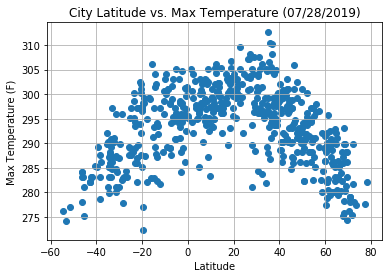

In [263]:
#Plotting lat vs max temperature
x = df['Latitude'].tolist()
y = df['Max Temperature'].tolist()
fig, ax = plt.subplots()
plt.scatter(x,y)
plt.title('City Latitude vs. Max Temperature (07/28/2019)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.savefig('maxtemp.png')

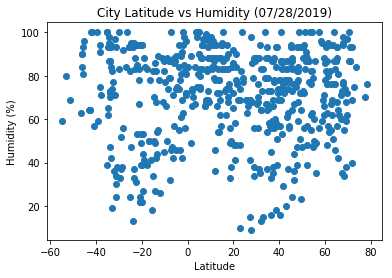

In [264]:
#Plotting lat vs humidity
plt.scatter(df['Latitude'].tolist(),df['Humidity'].tolist())
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity (07/28/2019)')
plt.savefig('humidity.png')

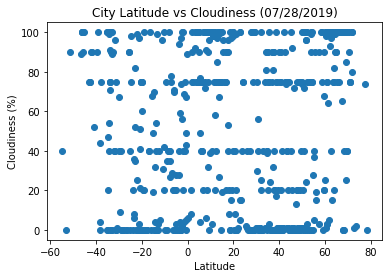

In [265]:
#Plotting lat vs cloudiness
plt.scatter(df['Latitude'].tolist(),df['Cloudiness'].tolist())
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness (07/28/2019)')
plt.savefig('cloudiness.png')

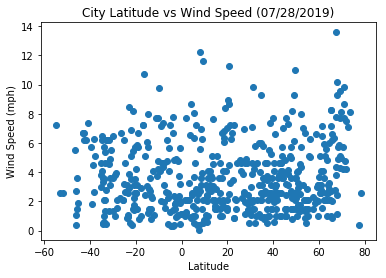

In [266]:
#Plotting lat vs Wind Speed Plot
plt.scatter(df['Latitude'].tolist(),df['Wind Speed'].tolist())
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs Wind Speed (07/28/2019)')
plt.savefig('wind_speed.png')

# Observable Trends

1. The maximum temperatures seem to decrease as the distance from the equator increases. 
2. There also seems to exist a less obvious parabolic relationship between humidity percentage and latitude. Near latitude 0, we find less points in the lower percentages relative to latitudes farther from the equator
3. Wind speeds and cloudiness tend to be uniform across the range of latitudes. 